In [51]:
import pandas as pd
housing = pd.read_csv('./housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Ở đây, mỗi dòng thể hiện cho dữ liệu của một căn hộ thu thập được, mỗi dữ liệu bao gồm 10 khía cạnh khác nhau tương ứng cho một cột dữ liệu.

In [52]:
# info() method khá là hữu dụng trong việc mô tả lại dữ liệu
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Như ở trên, có thể thấy được tập data bao gồm 20640 dữ liệu, có dữ liệu số phòng ngủ đang bị thiếu, và chỉ bao gồm 20433 dữ liệu. 

Tất cả các dữ liệu đều là dạng số trừ dữ liệu "ocean_proximity" có dạng object, nhưng từ việc xem qua những dữ liệu với method .head() ở trên, có thể thấy nó là dạng text.

Có thể sử dụng value_counts() để xem có bao nhiêu loại trong dữ liệu và mỗi loại có bao nhiêu samples

In [53]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [54]:
# describe() method sẽ cho thấy tổng hợp lại các giá trị số của data
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Các hàng count, mean, min, max khá dễ hiểu.

Hàng std thể hiện cho độ lệch chuẩn (standard deviation), một phép đo độ phân tán của các giá trị.

Các hàng 25%, 50%, 75% thể hiện rằng có bao nhiêu phần trăm giá trị trong cột nhỏ hơn giá trị này, ví dụ: housing_median_age: có 25% giá trị nhỏ hơn 18, 50% giá trị nhỏ hơn 29 và 75% giá trị là nhỏ hơn 37.

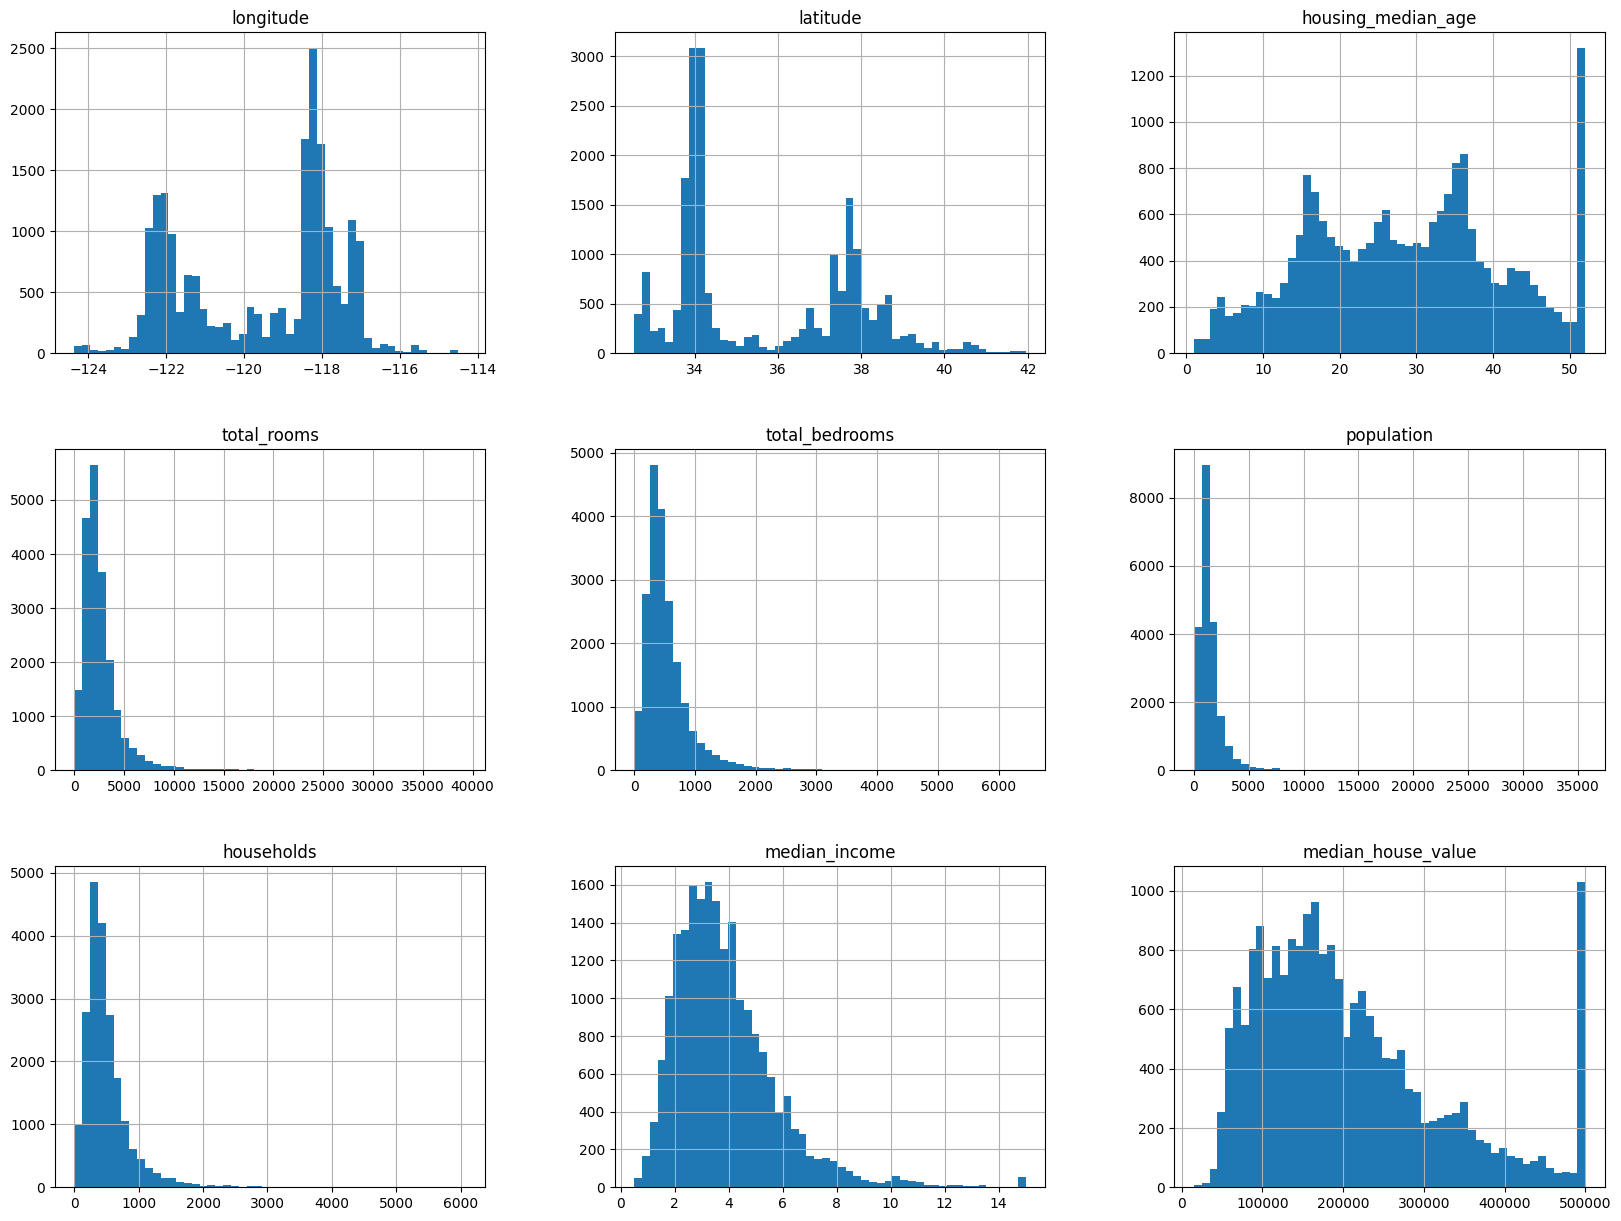

In [55]:
from matplotlib import pyplot as plt
# Một cách nhanh chóng khác là sử dụng mô biểu đồ histogram 
# với trục dọc biểu diễn số giá trị và trục ngang biểu diễn giá trị 
housing.hist(bins=50, figsize=(20,15)) # Hàm vẽ biểu đồ histogram, bins là số cột và figsize là kích thước biểu đồ
plt.show()

1. Đầu tiên thì ở mục median_income, với dữ liệu đã được chuẩn hóa và bị giới hạn ở trong khoảng 15 và 0.5.

2. Như ở trên biểu đồ, ta có thể thấy dữ liệu của housing_median_age và median_house_value cũng đã bị giới hạn. Điều này có thể tạo ra vấn đề nghiêm trọng khiếm model có thể cho rằng giá nhà sẽ không bao giờ đi qua giới hạn này. Lúc này sẽ có 2 lựa chọn: 
    * Đi thu thập dữ liệu thêm đối với các label bị giới hạn giá trị.
    * Loại bỏ những mẫu này ra khỏi tập huấn luyện và kiểm tra.

3. Các thuộc tính này có các thang đo khác nhau.

4. Hầu hết các biểu đồ đều bị lệch dương, chúng ta sẽ phải tìm các đưa về phân phối chuẩn (Gauss Distribution)


# Create test set

Chúng ta mới đi qua sơ lược về các dữ liệu có trong bảng. Chúng ta vẫn cần tìm hiểu kĩ hơn về dữ liệu trước khi quyết định sử dụng thuật toán nào. Bởi vì chúng ta muốn tránh hiện tượng (data snooping bias-hiện tượng khi models học được dữ liệu ở tập test sẽ tạo ra kết quả đánh giá khả quan nhưng sẽ kém hiệu quả khi triển khai thực tế) nên sẽ chia dữ liệu ra thành tập train và test. Thông thường sẽ là 20% dữ liệu sẽ thành dữ liệu test. 

In [56]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # Trộn tệp dữ liệu một cách ngẫu nhiên
    test_set_size = int(len(data) * test_ratio) # Nhân lấy số lượng dữ liệu 
    test_indices = shuffled_indices[:test_set_size] # Chia tập test
    train_indices = shuffled_indices[test_set_size:] # Chia tập train
    return data.iloc[train_indices], data.iloc[test_indices] # Trả về tập train và test 



In [57]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")


16512 train + 4128 test


Cách trên, nhìn thì có thể hiệu quả nhưng sẽ xuất hiện vấn đề:
1. Mỗi lần chạy lại dữ liệu thì sẽ trộn lại tệp dữ liệu dẫn đến việc tệp train test mỗi lần huấn luyện mô hình sẽ khác nhau:
    - Lưu lại dữ liệu train/test cho lần chạy đầu tiên
    - Sử dụng np.random.seed(42)
2. Nhưng mỗi lần thêm samples vào dataset thì lại phải suffle lại, làm sao để đảm bảo dữ liệu train và test của các lần trước không bị lẫn vào nhau?
    - Sử dụng hàm băm cho định danh (id) và lấy byte cuối cùng rồi so sánh với 51 (20% của 256) để đảm bảo không bị lẫn.

In [58]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
 ids = data[id_column]
 in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
 return data.loc[~in_test_set], data.loc[in_test_set]


In [59]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [60]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")


In [61]:
# Mọi người có thể sử dụng thư viện có sẵn của scikit learn để chia dữ liệu
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Các dữ liệu chia cho train, test sẽ được phân chia ngẫu nhiên, nên sẽ có khả năng gặp trường hợp bị thiên vị, cần phải tránh trường hợp này làm sao cho tập train/test có thể đại diện cho toàn bộ dữ liệu (stratified sampling). Giả sử trường hợp cột median_income 

<Axes: >

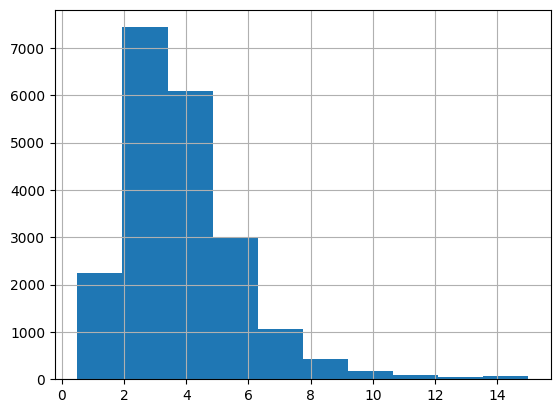

In [62]:
housing["median_income"].hist()

In [63]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


C:\Users\dungb\AppData\Local\Temp\ipykernel_23644\2590504005.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


In [64]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

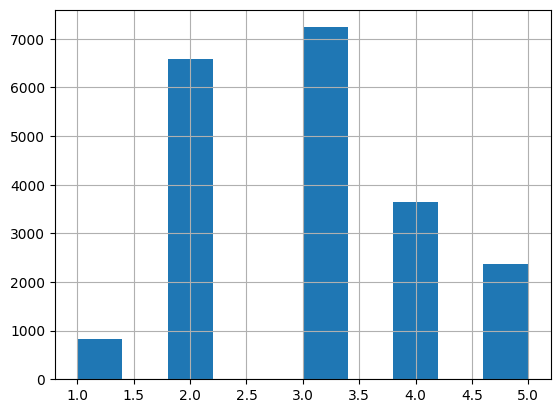

In [65]:
housing["income_cat"].hist()

In [66]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
housing["income_cat"].value_counts() / len(housing)


income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [67]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [68]:
# Vì cột income_cat chỉ là giả định để kiểm tra phân tầng dữ liệu nên sẽ xóa cột đó đi 
# để tránh ảnh hưởng đến kết quả train model
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)


# Khám phá và trực quan hóa dữ liệu

In [69]:
# Để tránh gây ảnh hưởng đến tập train khi khám phá dữ liệu, hãy tạo ra một bản copy cho nó
housing = strat_train_set.copy()


### Trực quan hóa dữ liệu địa lý

<Axes: xlabel='longitude', ylabel='latitude'>

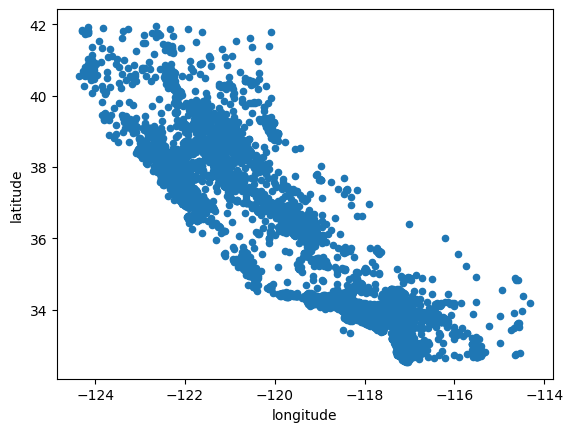

In [70]:
housing.plot(kind="scatter", x="longitude", y="latitude")


Ở biểu đồ trên, sẽ rất khó thấy được sự phân bố của các điểm dữ liệu. Ở đâu các điểm dữ liệu có mật độ cao?

<Axes: xlabel='longitude', ylabel='latitude'>

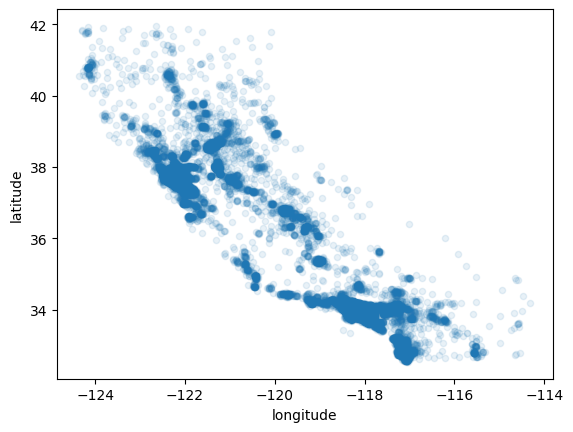

In [71]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

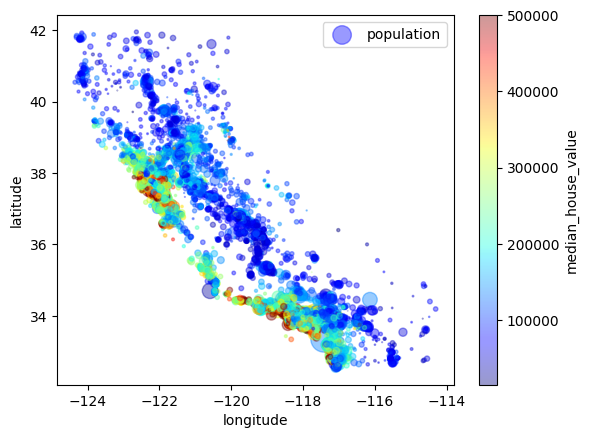

In [72]:
# Thêm liên kết với giá nhà.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", # Diện tích hình tròn càng lớn, dân càng đông
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, # Màu càng đậm, giá càng cao
)
plt.legend()


C:\Users\dungb\AppData\Local\Temp\ipykernel_23644\3065857756.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


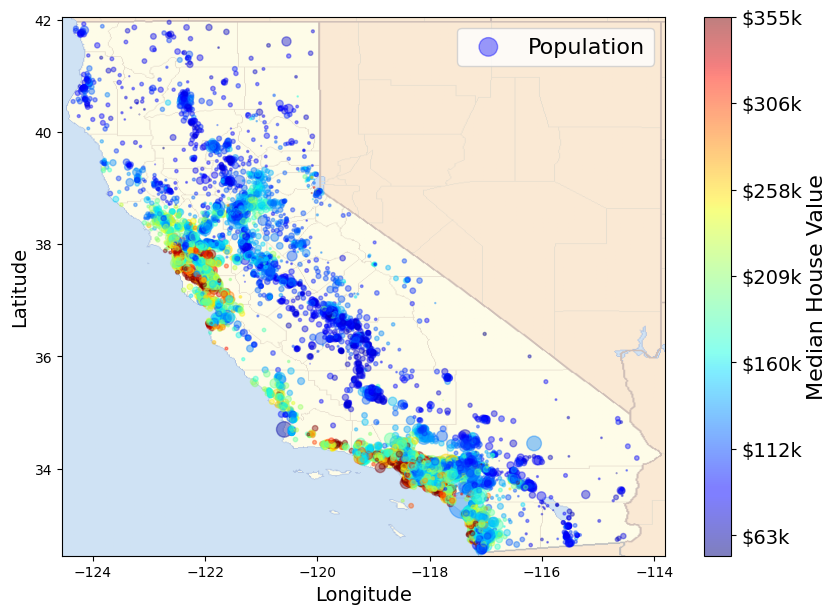

In [73]:
import matplotlib.image as mpimg
california_img=mpimg.imread('./california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

Kết luận: Dựa vào dữ liệu có thể đoán là giá nhà có liên quan đến địa lý và mật độ dân cư. Có thể sẽ dùng thuật toán phân cụm(Clustering), đo khoảng cách từ vị trí trung tâm của cụm? Điều này cũng cho thấy có vẻ cột ocean_proximity có liên quan gì đó đến giá nhà?  

### Tìm kiếm sự tương quan trong dữ liệu

In [74]:
housing = housing.select_dtypes(include=['number'])
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Hệ số tương quan đo mức độ liên quan tuyến tính của dữ liệu. Mối tương quan nằm trong khoảng -1 đến 1. 
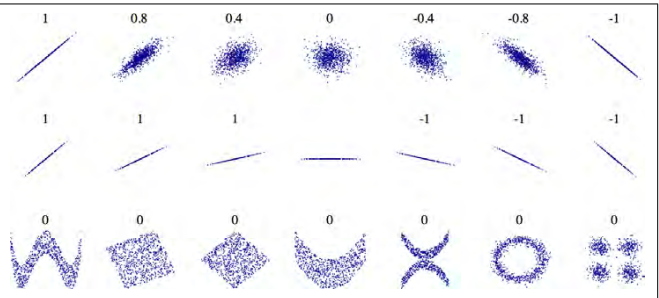

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

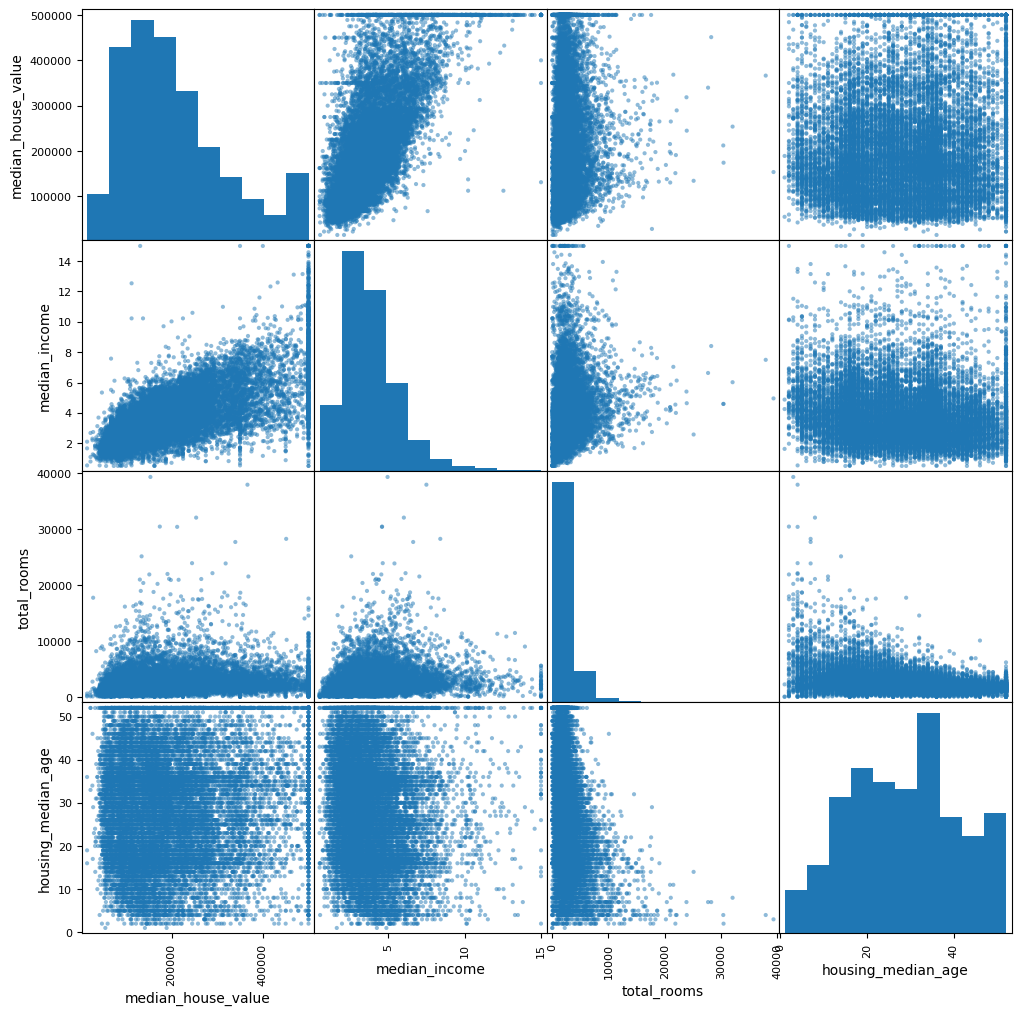

In [75]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 12))

Từ việc so sánh mối tương quan, có thể thấy việc dự đoán giá nhà dựa theo thu nhập trung bình có vẻ khá hứa hẹn

<Axes: xlabel='median_income', ylabel='median_house_value'>

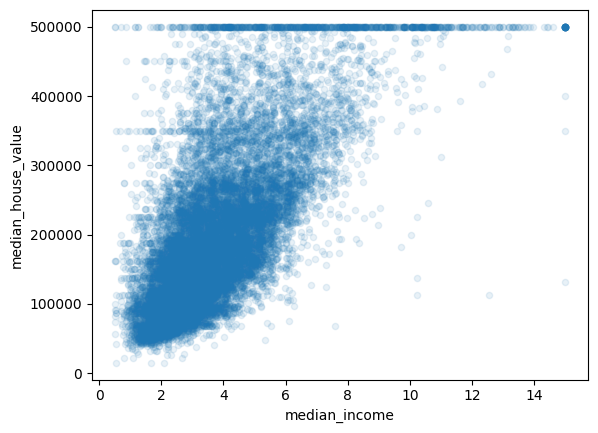

In [76]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)


Nhận xét: Ở đây có thể thấy mối quan hệ tuyến tính giữa 2 dữ liệu này khá là mạnh, tuy nhiên dễ thấy rằng giá nhà dễ thấy bị chặn ở $500000. Thêm nữa, có thể thấy những đường ngang mờ ở khoảng giá $350k, và khoảng hơn $450k, có thể sẽ có những đường khác nữa. Có thể sẽ phải loại bỏ đi để tránh cho thuật toán tái tạo lại những điểm bất thường này.

### Thử nghiệm kết hợp thuộc tính

Có những thuộc tính của dữ liệu bị dấu hiệu lệch dương, ở khâu này sẽ cố giải quyết vấn đề đó, một trong những cách phổ biến là kết hợp thuộc tính lại với nhau

In [77]:

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0


In [78]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Chuẩn bị dữ liệu cho thuật toán

Quay về tập dữ liệu train gốc và loại bỏ cột mục tiêu. 

In [79]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

Hầu hết các thuật toán máy học không thể làm việc với dữ liệu thiếu. Có 3 hướng giải quyết: 
- Loại bỏ các mẫu tương ứng
- Loại bỏ toàn bộ thuộc tính
- Chọn giá trị thay thế cho nó

Điều này có thể đạt được dễ dàng với các method của pandas dataframe: dropna(), drop(), and fillna()

In [80]:
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median) # option 3

12655     797.0
15502     855.0
2908      310.0
14053     519.0
20496     646.0
          ...  
15174    1231.0
12661    1422.0
19263     166.0
19140     580.0
19773     222.0
Name: total_bedrooms, Length: 16512, dtype: float64

Note: Nếu chọn options 3, hãy lưu lại giá trị này để có thể dùng thay thế cho tệp test và cả các dữ liệu thực tế sau này.

In [81]:
# Có thể sử dụng scikit-learn để xử lý missing value như sau 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [82]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [83]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

### Xử lý dữ liệu text và thuộc tính phân loại

Bởi vì các thuật toán ML thích hợp làm việc với các giá trị số hơn giá trị dạng text, nên chúng ta sẽ phải mã hóa lại các thuộc tính chữ.



In [84]:
# Sử dụng LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([1, 4, 1, ..., 0, 0, 1])

In [85]:
# Các lớp mã hóa sẽ dựa vào index trong array bên dưới, 0: "<1H OCEAN",...
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [86]:
# Sử dụng OnehotEncoder để mã hóa OneHot

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

Ở đây, sau khi encode sẽ xuất hiện sparse matrix, tuy nhiên sẽ tốn rất nhiều bộ nhớ để lưu trữ nếu phân loại lên đến hàng nghìn loại khác nhau.
Có thể sẽ chỉ lưu lại vị trí chứa số 1 trong matrix thay vì lưu lại 1 matrix với rất nhiều số 0 như vậy.

In [87]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [88]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

### Tạo pipeline biến đổi dữ liệu

In [89]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [90]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [91]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [93]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [94]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [95]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [96]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [97]:
housing_prepared.shape

(16512, 16)

In [98]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [100]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder()),
    ])

In [101]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [102]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 198144 stored elements and shape (16512, 16)>

In [103]:
np.allclose(housing_prepared, old_housing_prepared)

NotImplementedError: subtracting a sparse array from a nonzero scalar is not supported

# Chọn Machine Learning model

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

NameError: name 'housing_prepared' is not defined